In [1]:
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
data=pd.read_csv("bank_clustering.csv")

In [3]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [4]:
data.isnull().sum()

Bank                   0
DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


In [6]:
clust_data=data.drop(['Bank'],axis=1)

In [7]:
orginal=data.copy()

In [8]:
lst=['Bank','DD','Withdrawals','Deposits','Branch Area in sqft','avg daily walkins']

In [11]:
#label encoding
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_data=ss.fit_transform(clust_data)

In [12]:
scaled_data

array([[-0.07888413, -0.06497257,  1.02602411, -1.08710095,  0.48432644],
       [-1.64081915, -1.13811308, -0.58410514,  1.31763546, -1.949528  ],
       [ 1.10758573, -0.02978763, -0.19907423, -0.83517619,  0.84400936],
       ...,
       [ 1.51308809, -1.13811308,  0.92101568, -0.19391314,  0.92793538],
       [-0.60453534,  0.44520899, -1.66919225, -0.40003341, -1.12225728],
       [ 1.48305088,  0.62113366,  0.53598477, -0.53744692,  2.01897357]])

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) 

In [14]:
print(wcss)

[1944.110045307983, 1593.8960657341067, 1375.404517124812, 1219.8322372940042, 1122.6399441779706, 1021.0138628309405, 941.7569074987412, 885.5217123881133]


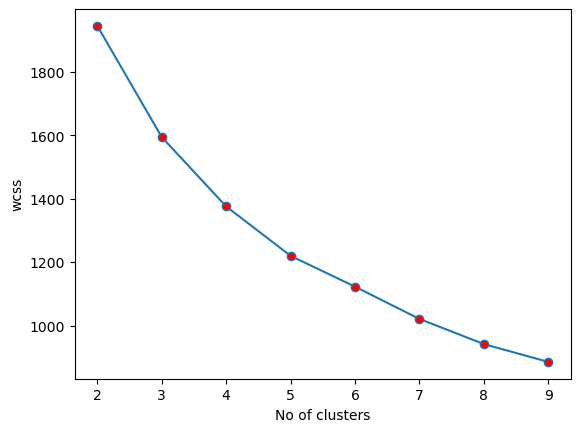

In [15]:
# to plot the graph of k values vs wcss ie elbow curve
list=[i for i in range(2,10)]
plt.figure()
plt.plot(list,wcss,marker='o',mfc='red')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
kmeans=KMeans(n_clusters=6)
y_pred_clusters=kmeans.fit_predict(scaled_data)

In [17]:
y_pred_clusters  #+1

array([1, 0, 2, 4, 1, 3, 0, 3, 2, 2, 3, 1, 2, 4, 4, 4, 3, 4, 5, 4, 0, 0,
       3, 2, 4, 4, 1, 0, 1, 2, 2, 5, 1, 1, 4, 1, 3, 4, 2, 3, 0, 2, 4, 3,
       3, 1, 2, 4, 3, 1, 0, 2, 1, 2, 0, 2, 3, 4, 1, 4, 4, 4, 4, 1, 1, 0,
       1, 5, 0, 2, 3, 5, 1, 5, 2, 4, 4, 0, 4, 2, 2, 3, 4, 0, 4, 1, 2, 1,
       0, 4, 4, 1, 2, 1, 1, 3, 3, 2, 0, 1, 1, 3, 4, 1, 2, 1, 1, 3, 2, 4,
       1, 0, 4, 4, 5, 3, 4, 4, 4, 1, 4, 3, 1, 1, 1, 0, 4, 3, 4, 4, 0, 4,
       4, 2, 2, 1, 0, 3, 2, 1, 1, 3, 4, 2, 2, 0, 2, 4, 2, 1, 0, 2, 2, 2,
       1, 3, 4, 4, 3, 1, 3, 5, 1, 2, 2, 4, 0, 0, 2, 4, 4, 4, 4, 5, 3, 2,
       5, 1, 5, 5, 0, 3, 3, 0, 1, 4, 2, 5, 4, 0, 1, 3, 3, 4, 5, 3, 5, 3,
       1, 4, 0, 4, 4, 0, 2, 3, 3, 1, 1, 4, 4, 4, 4, 0, 4, 4, 1, 1, 4, 2,
       2, 0, 4, 4, 2, 0, 1, 3, 2, 3, 2, 3, 1, 4, 5, 1, 1, 1, 1, 4, 2, 3,
       1, 4, 5, 4, 1, 0, 1, 3, 3, 1, 3, 2, 4, 4, 0, 4, 1, 3, 2, 0, 4, 3,
       3, 3, 5, 0, 2, 2, 4, 4, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 4, 4, 2, 4, 0, 4, 4, 5, 0, 1, 2, 2,

In [18]:
df=pd.DataFrame(scaled_data,columns=clust_data.columns)
df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


In [55]:

data['cluster Label']=y_pred_clusters

In [24]:
clust_data

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster_type,cluster Label
0,227,147,111,2460,639,1,1
1,123,86,65,3510,436,0,0
2,306,149,76,2570,669,2,2
3,251,112,129,3650,623,4,4
4,174,135,128,3400,579,1,1
...,...,...,...,...,...,...,...
510,337,140,111,2640,694,2,2
511,168,131,60,2640,524,5,5
512,333,86,108,2850,676,4,4
513,192,176,34,2760,505,3,3


In [25]:
clust_data.groupby('cluster Label').mean()


,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster_type
cluster Label,,,,,,
0,158.388060,94.716418,92.328358,3217.611940,485.179104,0.0
1,187.290698,185.720930,110.116279,2973.953488,617.895349,1.0
2,288.728972,199.177570,84.112150,2595.887850,706.336449,2.0
3,189.878049,190.865854,50.780488,3103.780488,566.146341,3.0
4,290.832117,100.343066,77.817518,3113.211679,599.043796,4.0
5,182.861111,127.194444,71.888889,2256.527778,515.666667,5.0


In [ ]:
# Hierarchical clustering

In [46]:
clust_data.head()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster_type,cluster Label
0,227,147,111,2460,639,1,1
1,123,86,65,3510,436,0,0
2,306,149,76,2570,669,2,2
3,251,112,129,3650,623,4,4
4,174,135,128,3400,579,1,1


In [47]:
import scipy.cluster.hierarchy as sch

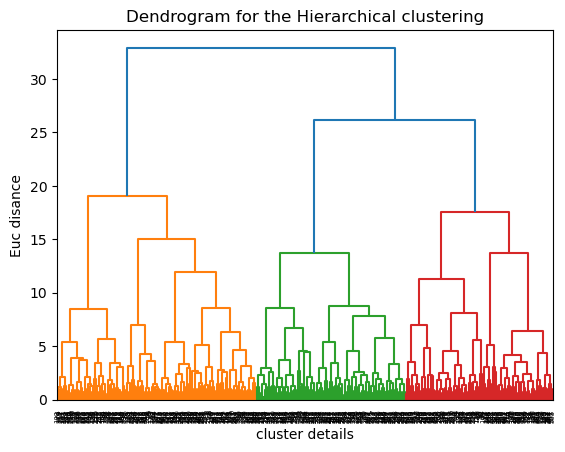

In [48]:
dendrogram=sch.dendrogram(sch.linkage(scaled_data,method='ward'))
plt.title('Dendrogram for the Hierarchical clustering')
plt.xlabel('cluster details')
plt.ylabel('Euc disance')
plt.show()

In [29]:
# from above we consider 6 / 7 cluster

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')


In [50]:
y_pred_hc=hc.fit_predict(data)

In [51]:
y_pred_hc

array([1, 3, 1, 3, 3, 3, 0, 0, 2, 0, 1, 1, 0, 3, 0, 3, 0, 0, 1, 0, 0, 3,
       3, 2, 0, 0, 3, 0, 1, 1, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 3, 0,
       0, 2, 2, 3, 1, 0, 3, 0, 0, 2, 3, 2, 3, 1, 0, 3, 3, 0, 3, 1, 0, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 3, 3, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 1, 3, 2, 0, 0, 0, 0, 1, 3, 0, 3, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 0, 0, 3, 3, 0, 1, 0,
       0, 0, 2, 1, 3, 0, 2, 1, 3, 0, 0, 2, 1, 0, 1, 0, 2, 3, 0, 2, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 2, 1, 1, 2, 0, 3, 0, 2, 3, 0, 3, 0, 1, 1, 0,
       2, 1, 2, 2, 3, 0, 3, 3, 1, 3, 0, 1, 3, 1, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 2, 1, 3, 0, 0, 3, 3, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0,
       2, 0, 2, 1, 3, 3, 0, 0, 0, 1, 3, 1, 3, 0, 0, 0, 1, 1, 2, 3, 0, 0,
       3, 0, 2, 0, 1, 0, 0, 3, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 3, 1,
       1, 2, 0, 3, 3, 1, 1, 3, 1, 0, 2, 3, 0, 2, 1,

In [53]:
data['Hierarchical cluster_type']=y_pred_hc

In [56]:
data.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Hierarchical cluster_type,cluster Label
0,1,227,147,111,2460,639,1,1
1,2,123,86,65,3510,436,3,0
2,3,306,149,76,2570,669,1,2
3,4,251,112,129,3650,623,3,4
4,5,174,135,128,3400,579,3,1
